In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


<a name="2"></a>
## 2 - ReLU Activation
This week, a new activation was introduced, the Rectified Linear Unit (ReLU). 
$$ a = max(0,z) \quad\quad\text {# ReLU function} $$

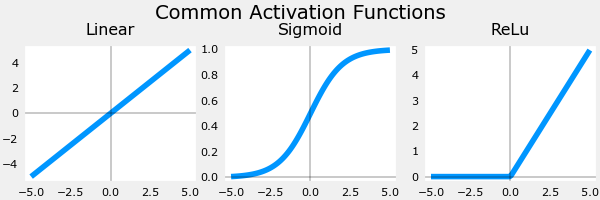

In [12]:
plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
The example from the lecture on the right shows an application of the ReLU. In this example, the derived "awareness" feature is not binary but has a continuous range of values. The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero.     
The "off" feature makes the ReLU a Non-Linear activation. Why is this needed? Let's examine this below. 

### Why Non-Linear Activations?  
<img align="left" src="./images/C2_W2_ReLU_Graph.png"     style=" width:250px; padding: 10px 20px; " > The function shown is composed of linear pieces (piecewise linear). The slope is consistent during the linear portion and then changes abruptly at transition points. At transition points, a new linear function is added which, when added to the existing function, will produce the new slope. The new function is added at transition point but does not contribute to the output prior to that point. The Non-linear activation function is responsible for disabling the input prior to and sometimes after the transition points. The following exercise provides a more tangible example.

The exercise will use the network below in a regression problem where you must model a piecewise linear target :
<img align="center" src="./images/C2_W2_ReLU_Network.png"     style=" width:650px; padding: 10px 20px; ">  
The network has 3 units in the first layer. Each will be responsible for one piece of the target. Unit 0 is pre-programmed and fixed to map the the first segment. You will modify weights and biases in unit 1 and 2 to model the 2nd and 3rd segment. The output unit is also fixed and simply sums the outputs of the first layer.  

Using the sliders below, modify weights and bias to match the target. 
Hints: Start with `w1` and `b1` and leave `w2` and `b2` zero until you match the 2nd segment. Clicking rather than sliding is quicker.  If you have trouble, don't worry, the text below will describe this in more detail.

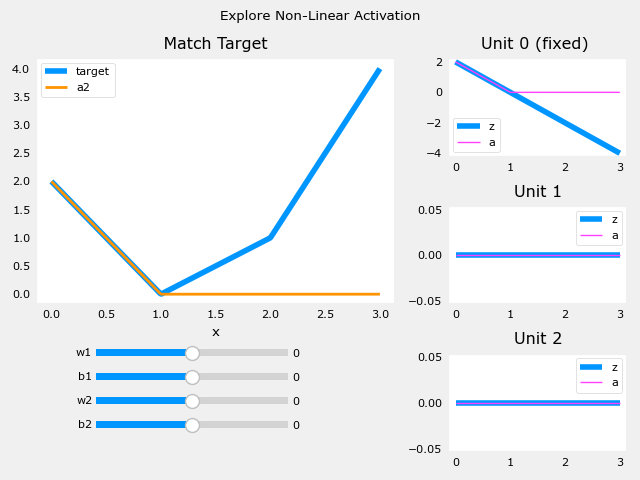

In [13]:
_ = plt_relu_ex()

 
The goal of this exercise is to appreciate how the ReLU's non-linear behavior provides the needed ability to turn functions off until they are needed. Let's see how this worked in this example.
<img align="right" src="./images/C2_W2_ReLU_Plot.png"     style=" width:600px; padding: 10px 20px; "> 
The plots on the right contain the output of the units in the first layer.   
Starting at the top, unit 0 is responsible for the first segment marked with a 1. Both the linear function $z$ and the function following the ReLU $a$ are shown. You can see that the ReLU cuts off the function after the interval [0,1]. This is key as it prevents from interfering with the following segment. 

Unit 1 is responsible for the 2nd segment. Here the ReLU kept this unit quiet until after x is 1. Since the first unit is not contributing, the slope for unit 1, $w^{[1]}_1$, is just the slope of the target line. The bias must be adjusted to keep the output negative until x has reached 1.

Unit 2 is responsible for the 3rd segment. The ReLU again zeros the output until x reaches the right value.The slope of the unit, $w^{[1]}_2$, must be set so that the sum of unit 1 and 2 have the desired slope. The bias is again adjusted to keep the output negative until x has reached 2.

The "off" or disable feature  of the ReLU activation enables models to stitch together linear segments to model complex non-linear functions.


# =======End of new Material===

## New Activation
This week a new activation was introduced, the Rectified Linear Unit (ReLU). 

(100,) [-5.   -4.9  -4.8  -4.7  -4.6  -4.49 -4.39 -4.29 -4.19 -4.09 -3.99 -3.89
 -3.79 -3.69 -3.59 -3.48 -3.38 -3.28 -3.18 -3.08 -2.98 -2.88 -2.78 -2.68
 -2.58 -2.47 -2.37 -2.27 -2.17 -2.07 -1.97 -1.87 -1.77 -1.67 -1.57 -1.46
 -1.36 -1.26 -1.16 -1.06 -0.96 -0.86 -0.76 -0.66 -0.56 -0.45 -0.35 -0.25
 -0.15 -0.05  0.05  0.15  0.25  0.35  0.45  0.56  0.66  0.76  0.86  0.96
  1.06  1.16  1.26  1.36  1.46  1.57  1.67  1.77  1.87  1.97  2.07  2.17
  2.27  2.37  2.47  2.58  2.68  2.78  2.88  2.98  3.08  3.18  3.28  3.38
  3.48  3.59  3.69  3.79  3.89  3.99  4.09  4.19  4.29  4.39  4.49  4.6
  4.7   4.8   4.9   5.  ]


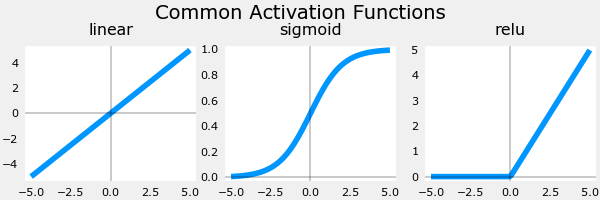

In [128]:
def plt_act_trio():
    X = np.linspace(-5,5,100)
    print(f"{X.shape} {X}")
    fig,ax = plt.subplots(1,3, figsize=(6,2))
    widgvis(fig)
    ax[0].plot(X,tf.keras.activations.linear(X))
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("linear")
    ax[1].plot(X,tf.keras.activations.sigmoid(X))
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("sigmoid")
    ax[2].plot(X,tf.keras.activations.relu(X))
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("relu")
    fig.suptitle("Common Activation Functions", fontsize=14)
    fig.tight_layout(pad=0.2)
    plt.show()
plt_act_trio()

<right images>
    The example on the right shows an application of the ReLu. In this example, the "awareness" feature is not binary but has a range that varies from 0 to a larger value. The sigmoid is best for on/off or binary situations. The ReLu provides a linear relationship And an 'off' range where the output is zero. The "off" feature makes the ReLu a Non-Linear activation. Why is this needed? Let's examine this with the example below.

[0.   0.06 0.13 0.19 0.25 0.32 0.38 0.44 0.51 0.57 0.63 0.7  0.76 0.83
 0.89 0.95 1.02 1.08 1.14 1.21 1.27 1.33 1.4  1.46 1.52 1.59 1.65 1.71
 1.78 1.84 1.9  1.97 2.03 2.09 2.16 2.22 2.28 2.35 2.41 2.48 2.54 2.6
 2.67 2.73 2.79 2.86 2.92 2.98 3.05 3.11 3.17 3.24 3.3  3.36 3.43 3.49
 3.55 3.62 3.68 3.74 3.81 3.87 3.93 4.   4.06 4.13 4.19 4.25 4.32 4.38
 4.44 4.51 4.57 4.63 4.7  4.76 4.82 4.89 4.95 5.01 5.08 5.14 5.2  5.27
 5.33 5.39 5.46 5.52 5.59 5.65 5.71 5.78 5.84 5.9  5.97 6.03 6.09 6.16
 6.22 6.28]


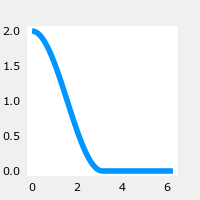

In [15]:
X = np.linspace(0,2*np.pi, 100)
print(X)
y = np.cos(X)+1
y[50:100]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

In [129]:
w10 = np.array([[-1]])
b10 = np.array([2.6])
d10 = Dense(1, activation="linear", input_shape=(1,))
dummy_input = np.zeros((1, 1))  # 创建一个假的输入来构建层
_ = d10(dummy_input)  # 这会构建层
# 2. 然后设置权重
d10.set_weights([w10, b10])
# print(d10)
z10 = d10(X.reshape(-1,1))
# print(z10)
a10 = relu(z10)
# print(a10)

<Dense name=dense_42, built=True>
tf.Tensor(
[[2.81]
 [1.16]
 [2.81]
 [2.75]
 [3.82]
 [2.04]
 [3.8 ]
 [3.28]
 [1.96]
 [3.29]
 [2.29]
 [0.96]
 [4.23]
 [2.98]
 [1.26]
 [2.3 ]
 [1.12]
 [1.05]
 [1.51]
 [3.15]
 [4.29]
 [1.04]
 [3.67]
 [3.51]
 [2.07]
 [1.91]
 [1.06]
 [2.29]
 [2.86]
 [3.92]
 [1.41]
 [4.2 ]
 [1.43]
 [3.19]
 [1.24]
 [1.4 ]
 [1.96]
 [4.28]
 [1.99]
 [2.4 ]
 [3.51]
 [2.35]
 [1.44]
 [3.62]
 [3.2 ]
 [4.05]
 [1.68]
 [4.01]
 [1.22]
 [2.58]
 [3.43]
 [4.11]
 [1.55]
 [2.99]
 [1.32]
 [1.85]
 [4.09]
 [1.67]
 [1.53]
 [4.01]
 [2.06]
 [3.59]
 [3.22]
 [3.87]
 [4.23]
 [1.37]
 [1.15]
 [1.85]
 [3.81]
 [4.35]
 [3.12]
 [2.46]
 [2.94]
 [2.03]
 [3.42]
 [3.35]
 [4.36]
 [2.12]
 [1.45]
 [1.17]
 [2.35]
 [3.69]
 [2.96]
 [3.11]
 [4.18]
 [4.31]
 [3.31]
 [1.89]
 [2.13]
 [1.69]
 [1.35]
 [1.06]
 [1.62]
 [4.21]
 [1.03]
 [3.26]
 [1.32]
 [3.89]
 [2.11]
 [3.24]
 [1.63]
 [3.91]
 [2.62]
 [0.94]
 [1.87]
 [3.91]
 [2.1 ]
 [2.02]
 [1.52]
 [3.32]
 [3.87]
 [1.41]
 [3.12]
 [2.83]
 [1.06]
 [2.76]
 [4.1 ]
 [2.06]
 [1.9 ]
 [2

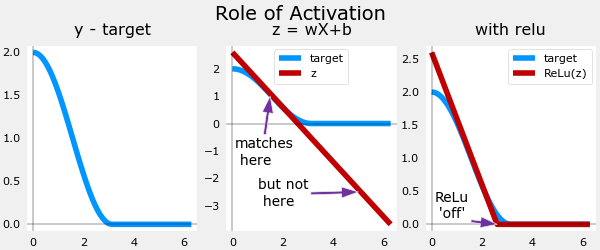

In [27]:
def plt_act1(y,z,a):
    fig,ax = plt.subplots(1,3, figsize=(6,2.5))
    widgvis(fig)
    ax[0].plot(X,y,label="target")
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("y - target")
    ax[1].plot(X,y, label="target")
    ax[1].plot(X,z, c=dlc["dldarkred"],label="z")
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("z = wX+b")
    ax[1].legend(loc="upper center")
    ax[2].plot(X,y, label="target")
    ax[2].plot(X,a, c=dlc["dldarkred"],label="ReLu(z)")
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("with relu")
    ax[2].legend()
    fig.suptitle("Role of Activation", fontsize=14)
    fig.tight_layout(pad=0.2)
    return(ax)


def plt_add_notation(ax):
    ax[1].annotate(text = "matches\n here", xy =(1.5,1.0), 
                   xytext = (0.1,-1.5), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[1].annotate(text = "but not\n here", xy =(5,-2.5), 
                   xytext = (1,-3), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    ax[2].annotate(text = "ReLu\n 'off'", xy =(2.6,0), 
                   xytext = (0.1,0.1), fontsize=10,
                  arrowprops=dict(facecolor=dlc["dlpurple"],width=2, headwidth=8))
    
ax = plt_act1(y,z10,a10)
plt_add_notation(ax)

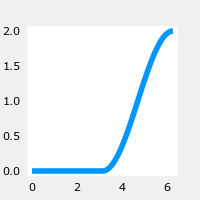

In [28]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
y[0:49]=0
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

array([<Axes: title={'center': 'y - target'}>,
       <Axes: title={'center': 'z = wX+b'}>,
       <Axes: title={'center': 'with relu'}>], dtype=object)

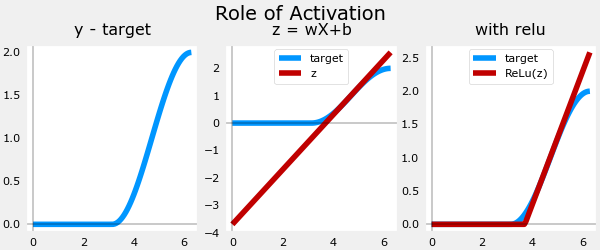

In [33]:
w11 = np.array([[1]])
b11 = np.array([-3.7])
d11 = Dense(1, activation = "linear", input_shape = (1,))
dumy_input = np.zeros((1,1))
_ = d11(dumy_input)
d11.set_weights([w11, b11])
z11 = d11(X.reshape(-1,1))
a11 = relu(z11)
plt_act1(y,z11,a11)

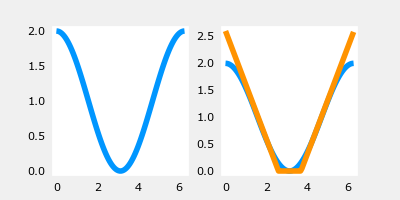

In [82]:
X = np.linspace(0,2*np.pi, 100)
y = np.cos(X)+1
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))

fig,ax = plt.subplots(1,2, figsize=(4,2))
widgvis(fig)
ax[0].plot(X,y)
ax[1].plot(X,y)
ax[1].plot(X,yhat)
plt.show()

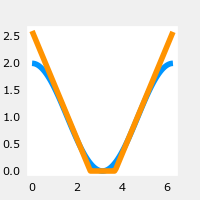

In [83]:
X=X.reshape(-1,1)
yhat = relu(d10(X)) + relu(d11(X))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

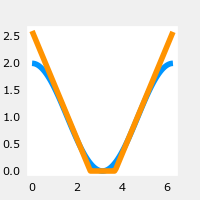

In [84]:
# yhat = model.predict(X.reshape(-1,1))
fig,ax = plt.subplots(1,1, figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
ax.plot(X,yhat)
plt.show()

In [94]:
import tensorflow as tf
model = Sequential(
    [ 
        d10,
         tf.keras.layers.Activation(relu),
        d11,
         tf.keras.layers.Activation(relu),
        Dense(1, activation = 'linear')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.1),
)

model.fit(
    X,y,
    epochs=200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3325 
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7531
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.55286
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5369
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5630 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5825
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5486
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5269  
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4947
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5125 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5310
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5045 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5159 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5025
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5112 
Epoch 16/200
4/4 ━━━

In [107]:
model = Sequential(
    [ 
        Dense(20,activation="relu", name = 'l1'),
        Dense(1,activation="linear", name = 'l2')
    ]
)
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=1000,
    verbose=0
)

In [108]:
yhat = model.predict(X)
yhat[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[2.21],
       [2.16],
       [2.11],
       [2.06],
       [2.01]], dtype=float32)

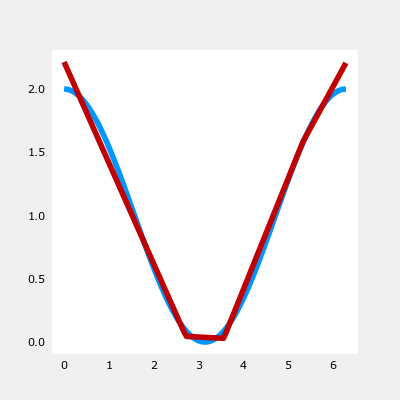

In [109]:
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

In [88]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')

In [89]:
l1.get_weights()

[array([[0.76]], dtype=float32), array([-0.36], dtype=float32)]

In [90]:
l2.get_weights()

[array([[-1.01]], dtype=float32), array([0.37], dtype=float32)]

In [110]:
l1 = model.get_layer('l1')
l2 = model.get_layer('l2')
l1.get_weights()
l2.get_weights()

w1 = np.array([[-1]])
b1 = np.array([1])
l1.set_weights([w1,b1])

w2 = np.array([[1]])
b2 = np.array([0])
l2.set_weights([w2,b2])
model.fit(
    X,y,
    epochs=100
)

ValueError: Layer l1 weight shape (1, 20) is not compatible with provided weight shape (1, 1).

In [92]:
l2.set_weights([w2,b2])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


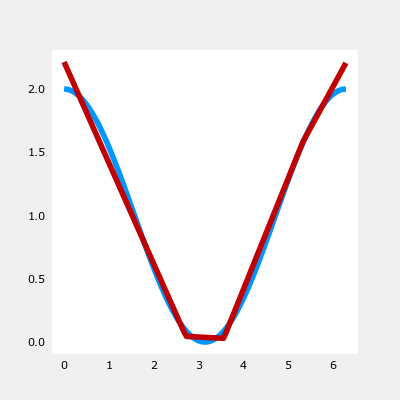

In [111]:
yhat = model.predict(X)
fig,ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat, c=dlc["dldarkred"])
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


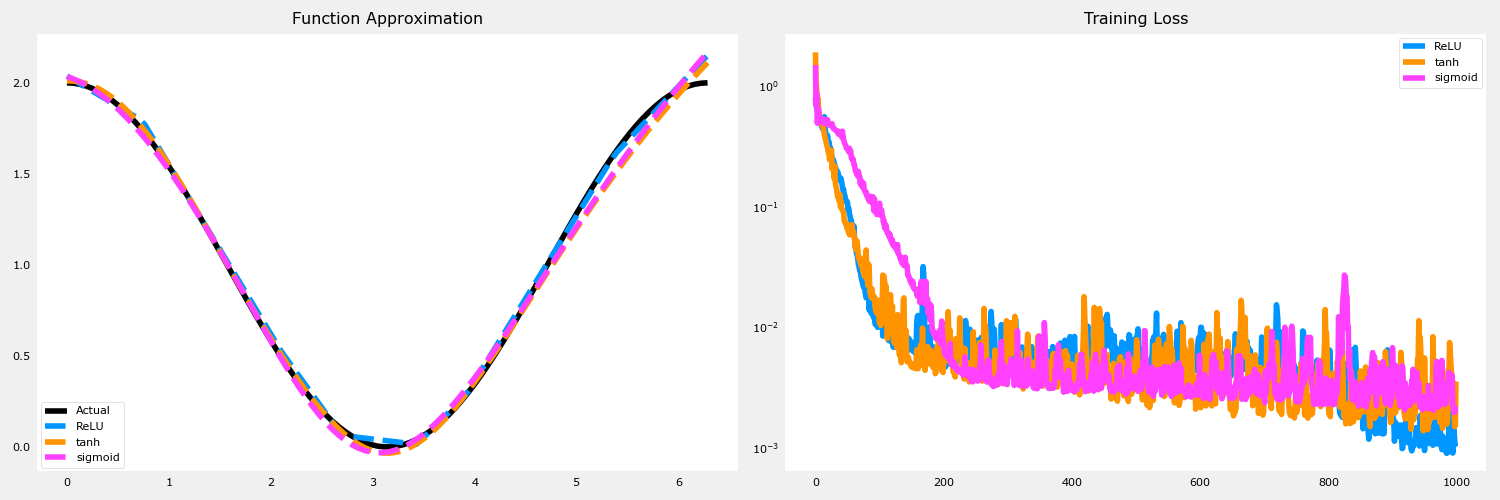

In [112]:
# 使用ReLU
model_relu = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(1, activation='linear')
])

# 使用tanh
model_tanh = Sequential([
    Dense(64, activation='tanh', input_shape=(1,)),
    Dense(1, activation='linear')
])

# 使用sigmoid
model_sigmoid = Sequential([
    Dense(64, activation='sigmoid', input_shape=(1,)),
    Dense(1, activation='linear')
])

# 编译和训练函数
def compile_and_train(model, X, y):
    model.compile(
        loss='mse',
        optimizer=tf.keras.optimizers.Adam(0.01)
    )
    return model.fit(X, y, epochs=1000, verbose=0)

# 训练所有模型
history_relu = compile_and_train(model_relu, X, y)
history_tanh = compile_and_train(model_tanh, X, y)
history_sigmoid = compile_and_train(model_sigmoid, X, y)

# 绘制比较图
plt.figure(figsize=(15, 5))

# 实际值和预测值比较
plt.subplot(1, 2, 1)
plt.plot(X, y, 'k-', label='Actual')
plt.plot(X, model_relu.predict(X), '--', label='ReLU')
plt.plot(X, model_tanh.predict(X), '--', label='tanh')
plt.plot(X, model_sigmoid.predict(X), '--', label='sigmoid')
plt.legend()
plt.title('Function Approximation')

# 损失函数比较
plt.subplot(1, 2, 2)
plt.plot(history_relu.history['loss'], label='ReLU')
plt.plot(history_tanh.history['loss'], label='tanh')
plt.plot(history_sigmoid.history['loss'], label='sigmoid')
plt.legend()
plt.title('Training Loss')
plt.yscale('log')

plt.tight_layout()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


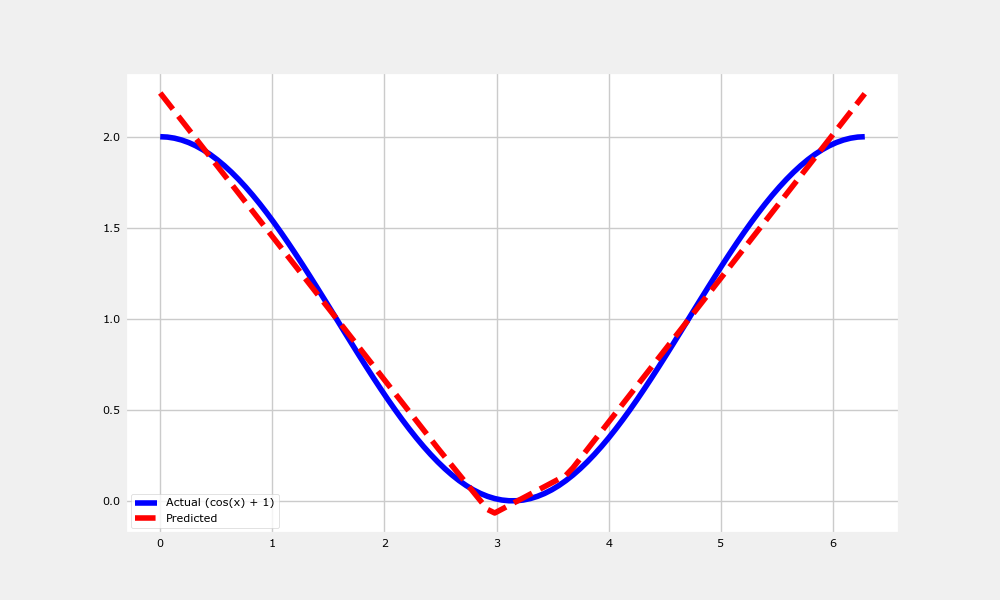

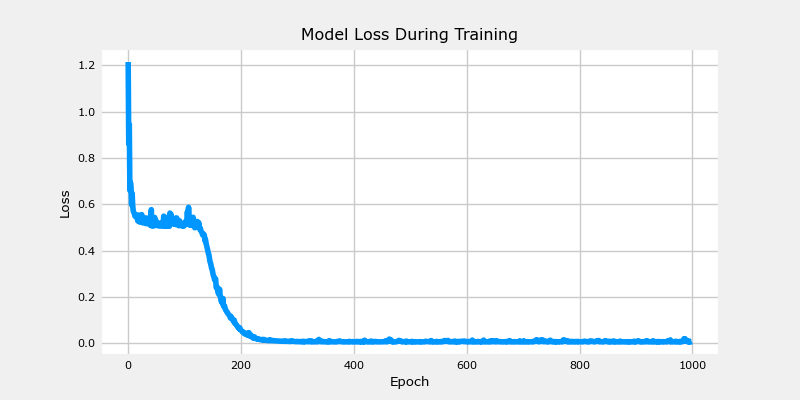

In [99]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 准备数据
X = np.linspace(0, 2*np.pi, 100)
y = np.cos(X) + 1
X = X.reshape(-1,1)

# 构建模型
model = Sequential([
    # 第一层使用多个神经元来捕捉复杂的非线性特征
    Dense(32, activation='relu', input_shape=(1,)),
    # 中间层
    # Dense(16, activation='relu'),
    # 输出层
    Dense(1, activation='linear')
])

# 编译模型
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

# 训练模型
history = model.fit(
    X, y,
    epochs=1000,
    verbose=0  # 设置为0可以抑制训练过程的输出
)

# 预测和可视化
y_pred = model.predict(X)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b-', label='Actual (cos(x) + 1)')
plt.plot(X, y_pred, 'r--', label='Predicted')
plt.legend()
plt.grid(True)
plt.show()

# 绘制损失曲线
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()

## 2-D

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
from lab_utils_common import dlc
dkcolors = plt.cm.Paired((1,3,7,9,5,11))
ltcolors = plt.cm.Paired((0,2,6,8,4,10))
dkcolors_map = mpl.colors.ListedColormap(dkcolors)
ltcolors_map = mpl.colors.ListedColormap(ltcolors)



In [114]:
def plt_mc_data(ax, X, y, classes,  class_labels=None, map=plt.cm.Paired, 
                legend=False, size=50, m='o', equal_xy = False):
    """ Plot multiclass data. Note, if equal_xy is True, setting ylim on the plot may not work """
    for i in range(classes):
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    c=col, vmin=0, vmax=map.N, cmap=map,
                    s=size, label=label)
    if legend: ax.legend()
    if equal_xy: ax.axis("equal")

def plt_mc(X_train,y_train,classes):
    css = np.unique(y_train)
    fig,ax = plt.subplots(1,1,figsize=(3,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    plt_mc_data(ax, X_train,y_train,classes, map=dkcolors_map, legend=True, size=10, equal_xy = False)
    ax.set_title("Multiclass Data")
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    return(ax)
    
def plot_cat_decision_boundary_mc(ax, X, predict , class_labels=None, legend=False, vector=True):

    # create a mesh to points to plot
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    h = max(x_max-x_min, y_max-y_min)/200
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    #print("points", points.shape)
    #print("xx.shape", xx.shape)

    #make predictions for each point in mesh
    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    Z = Z.reshape(xx.shape)

    #contour plot highlights boundaries between values - classes in this case
    ax.contour(xx, yy, Z, linewidths=1) 
    #ax.axis('tight')


[[0.   0.45]
 [0.61 0.21]
 [0.24 0.06]
 [0.67 0.19]
 [0.86 0.76]
 [0.09 0.56]
 [0.41 0.78]
 [0.66 0.08]
 [0.98 0.26]
 [0.26 0.3 ]
 [0.98 0.8 ]
 [0.09 0.42]
 [0.86 0.35]
 [0.29 0.64]
 [0.37 0.16]
 [0.48 0.81]
 [0.84 0.62]
 [1.   0.98]
 [0.24 0.77]
 [0.18 0.41]
 [0.01 0.2 ]
 [0.22 0.99]
 [0.04 0.95]
 [0.84 0.02]
 [0.14 0.63]
 [0.35 0.34]
 [0.7  0.99]
 [0.33 0.92]
 [0.73 0.85]
 [0.51 0.53]
 [0.55 0.57]
 [0.14 0.21]
 [0.15 0.19]
 [0.66 0.21]
 [0.88 0.12]
 [0.99 0.  ]
 [0.84 0.  ]
 [0.79 0.73]
 [0.69 0.35]
 [0.63 0.6 ]
 [0.74 0.71]
 [0.25 0.71]
 [0.31 0.39]
 [0.29 0.74]
 [0.83 0.25]
 [0.51 0.71]
 [0.82 0.73]
 [0.1  0.68]
 [0.91 0.44]
 [0.74 0.96]
 [0.69 0.29]
 [0.45 0.47]
 [0.85 0.97]
 [0.59 0.08]
 [0.95 0.99]
 [0.4  0.83]
 [0.43 0.7 ]
 [0.04 0.89]
 [0.04 0.22]
 [0.57 0.88]
 [0.27 0.09]
 [0.81 0.36]
 [0.74 0.19]
 [0.23 0.35]
 [0.78 0.94]
 [0.79 0.01]
 [0.81 0.64]
 [0.8  0.57]
 [0.03 0.8 ]
 [0.08 0.35]
 [0.54 0.29]
 [0.76 0.97]
 [0.46 0.95]
 [0.92 0.82]
 [0.73 0.02]
 [0.9  0.57]
 [0.13 0.69]

<Axes: title={'center': 'Multiclass Data'}, xlabel='x0', ylabel='x1'>

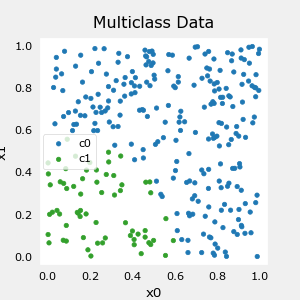

In [120]:
X = np.random.rand(300, 2)
print(X)
y = np.sqrt( X[:,0]**2 + X[:,1]**2 ) < 0.6
#y = np.logical_and( X[:,0] < 0.5, X[:,1] < 0.5 ).astype(int)
y.shape
plt_mc(X,y,2,)

In [121]:
model = Sequential(
    [ 
        Dense(2,activation="relu",    name = 'l1'),
        Dense(1,activation="sigmoid", name = 'l2')
    ]
)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=10
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - loss: 0.2449
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2203
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1837
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1600
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1452
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1449
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1559
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1361  
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1312
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1386


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


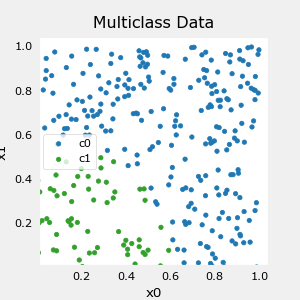

In [123]:
ax = plt_mc(X,y,2,)
predict = lambda  x: (model.predict(x) > 0.5).astype(int)
plot_cat_decision_boundary_mc(ax, X, predict, legend = True, vector=True)

In [124]:
l1 = model.get_layer("l1")
W1,b1 = l1.get_weights()
l2 = model.get_layer("l2")
W2,b2 = l2.get_weights()
print(W1,b1)
print(W2,b2)

[[ 0.83  0.12]
 [ 0.33 -1.14]] [ 0.25 -0.16]
[[-1.33]
 [ 0.67]] [-0.27]


In [125]:
x0 = np.array([0.4,0.60])
np.dot( np.dot(x0,W1) + b1, W2) + b2

array([-1.84])

In [126]:
## Example

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

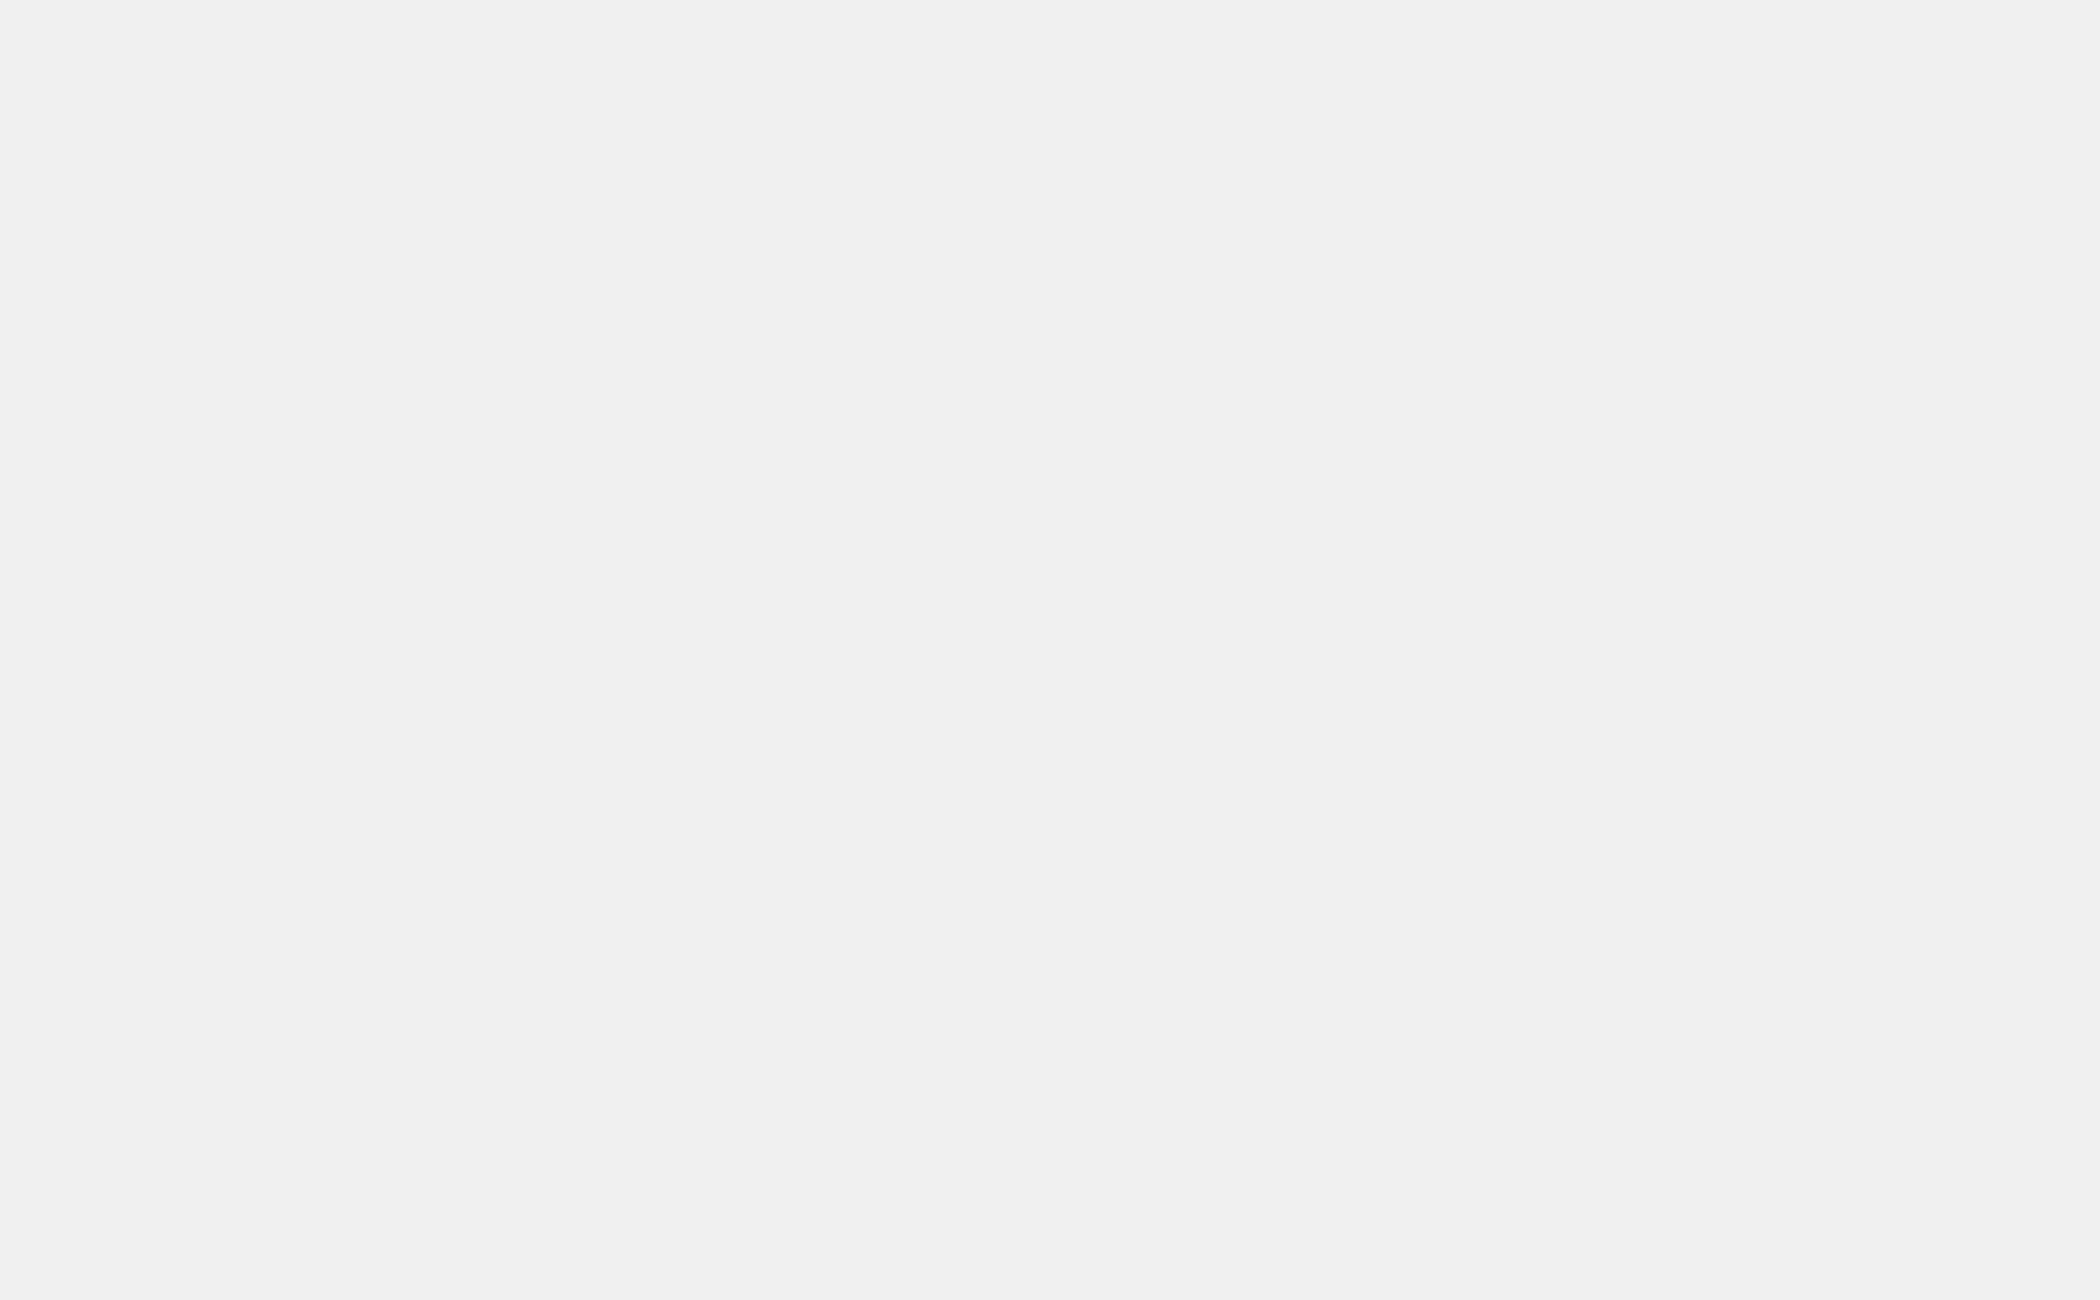

In [127]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

datasets = [
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            print(X.shape,algorithm)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()